In [39]:
import matplotlib.pyplot as plt 
from misc import *
import tensorflow as tf
from tqdm import tqdm
import os 
from RNN_models import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from misc import load_data, get_def_path

periods = 5
ppp=1000
defpath = get_def_path()
path = defpath+"{}periods/{}ppp/".format(periods,ppp)


In [41]:
means, covs, signals, coeffs = load_data(path)
tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]
A,dt,C,D = coeffs

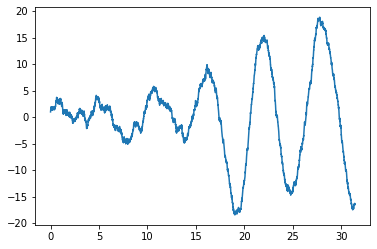

In [42]:
times = np.linspace(0,periods*2*np.pi, periods*ppp+1)
total_time = times[-1]
plt.plot(times, means[:,0])

In [45]:
rmodel = GRNNmodel([C,dt, total_time], cov_in=tf.convert_to_tensor(covs[0].astype(np.float32)), stateful=False)
rmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01))
rmodel.recurrent_layer(tfsignals[:,:10,:], initial_state=rmodel.initial_state)
rmodel.trainable_variables[0].assign(tf.convert_to_tensor(A.astype(np.float32)))



<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[ 0.,  1.],
       [-1.,  0.]], dtype=float32)>

In [46]:

history = rmodel.fit(x=tfsignals, y=tfsignals, 
                     epochs = 10**3, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='total_loss', 
                                                                                   min_delta=0, patience=500,
                                                                                   verbose=0,
                                                                                   mode='min')])



Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.1604 - Coeffs_A: 0.0050 - grads: -0.1252
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.3684 - Coeffs_A: 0.0039 - grads: 0.1719
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.3632 - Coeffs_A: 6.7769e-04 - grads: 0.7894
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.1580 - Coeffs_A: -7.1461e-04 - grads: -0.3249
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.1606 - Coeffs_A: -0.0016 - grads: -0.0874
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.1611 - Coeffs_A: -0.0023 - grads: -0.0278
Epoch 7/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.1600 - Coeffs_A: -0.0039 - grads: 0.5036
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - total_loss: 0.3637 - Coeffs_A: -0.0054 - grads: 0.0401
Epoch 9/1000
1/1 [=====

KeyboardInterrupt: 

In [28]:
histories = rmodel.history.history
keys_histories = list(histories.keys())
for k,v, in histories.items():
    np.save(train_path+"{}".format(k), v, allow_pickle=True)
